## 1 Linear Regression


### Univariate Linear regression.

   Area   Prices 
0     10       20
1     20       30
2     30       50
3     40       70
4     50      100
Columns in Datast:  Index(['Area ', 'Prices '], dtype='object')


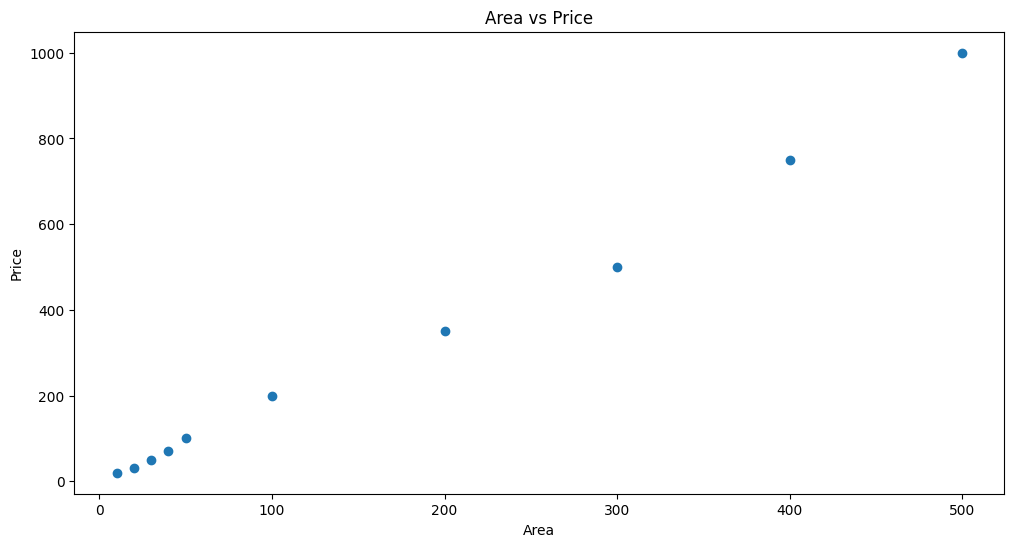


Regression Intercept (bias): [-10.38048425]
Regression Coefficient (weight): [[1.92930396]]
Predicted price:  [[182.54991201]]


In [ ]:
# importing required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

#loading dataset
house_df = pd.read_csv("/content/drive/MyDrive/House_Price - Sheet1.csv")
print(house_df.head())

print("Columns in Datast: ", house_df.columns)

# Area vs Price Plot

plt.figure(figsize = (12, 6))
plt.scatter(house_df['Area '], house_df['Prices '])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs Price')
plt.show()

# Df splitting

X = house_df['Area '].values.reshape(-1, 1)
y = house_df['Prices '].values.reshape(-1, 1)

# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

uni_lin_reg = LinearRegression()
uni_lin_reg.fit(X_train, y_train)

# Model Parameters
print(f"""
Regression Intercept (bias): {uni_lin_reg.intercept_}
Regression Coefficient (weight): {uni_lin_reg.coef_}""")

# Testing

price = 100*uni_lin_reg.coef_ + uni_lin_reg.intercept_
print("Predicted price: ", price)

### Multivariate

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the diabetes dataset
diabetes = load_diabetes()
x  = diabetes.data
y = diabetes.target
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model Building
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print the params
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


Mean Squared Error: 2900.193628493482
Coefficients: [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
Intercept: 151.34560453985995


### Ridge Regression

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predictions
y_pred = ridge.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output
print("Ridge Coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Ridge Coefficients: [  45.36737726  -76.66608563  291.33883165  198.99581745   -0.53030959
  -28.57704987 -144.51190505  119.26006559  230.22160832  112.14983004]
Intercept: 152.241675211113
Mean Squared Error: 3077.42
R² Score: 0.42


### Lasso Regression


In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predict
y_pred = lasso.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output
print("Lasso Coefficients:", lasso.coef_)
print("Intercept:", lasso.intercept_)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Lasso Coefficients: [   0.         -152.66477923  552.69777529  303.36515791  -81.36500664
   -0.         -229.25577639    0.          447.91952518   29.64261704]
Intercept: 151.57485282893947
Mean Squared Error: 2798.19
R² Score: 0.47


## 2 Logistic Regression

Accuracy: 76.40%

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.98      0.82        50
           1       0.95      0.49      0.64        39

    accuracy                           0.76        89
   macro avg       0.83      0.73      0.73        89
weighted avg       0.82      0.76      0.74        89



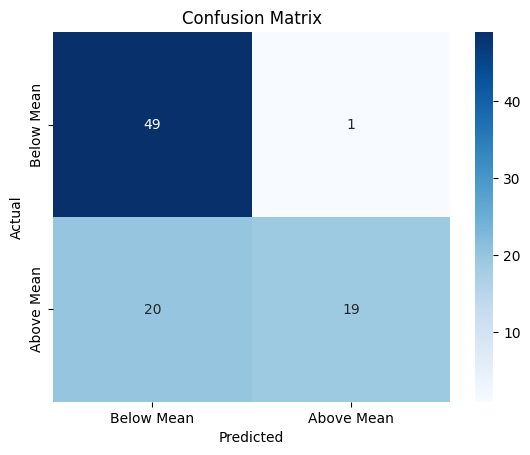

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target


threshold = y.mean()
y_binary = (y > threshold).astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Below Mean", "Above Mean"], yticklabels=["Below Mean", "Above Mean"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Decision Tree

Accuracy = 0.9333333333333333


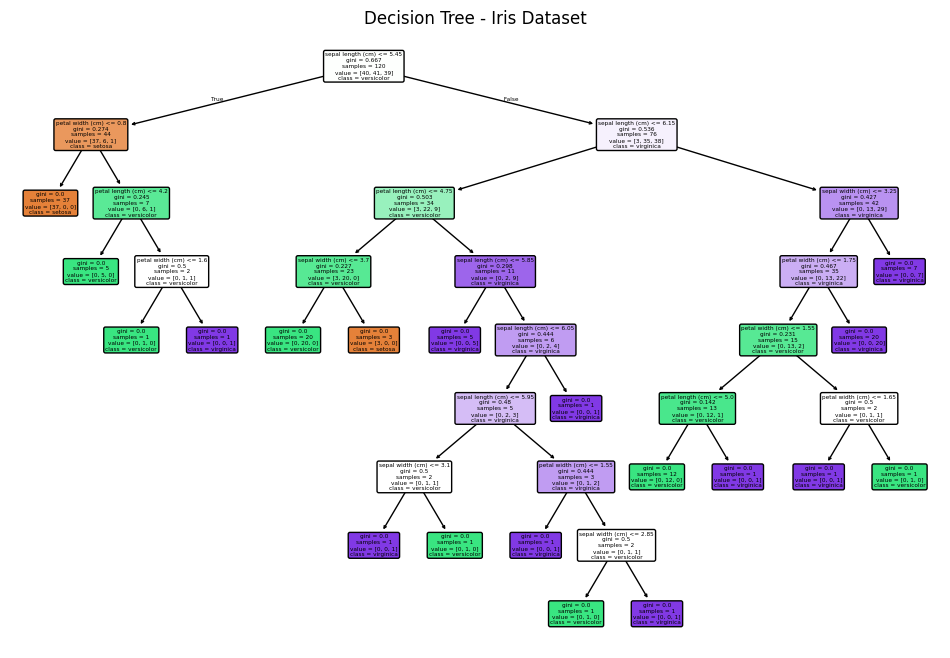

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Dtreeclf = DecisionTreeClassifier(max_features=1, criterion = "gini")
Dtreeclf.fit(X_train, y_train)

y_pred = Dtreeclf.predict(X_test)

print(f"Accuracy = {accuracy_score( y_test, y_pred)}")

# Plot Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(Dtreeclf,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True)
plt.title("Decision Tree - Iris Dataset")
plt.show()
